## Midterm Project
### Team members:
Alen Adiyev, Zhamilya Saparova, Nuray Serkali

# Problem 1 - Linear Regression

In [ ]:
import numpy as np
from random import seed
from random import randint
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline

#### Linear regression algorithm

In [ ]:
def linear_regression(x,y):
    
    # Step 1(a): Create matrix X of input features, bias=1
    X = np.zeros((len(y),len(x[:,0])+1))
    
    for i in range(0,len(x[:,0])+1):
        for j in range(0,len(y)):
            if i==0:
                X[j][i] = 1
            else:
                X[j][i] = x[i-1][j]
    
    # Step 1(b): Create target vector y_target
    y_target = np.zeros((len(y),1))
    for i in range(0,len(y)):
        y_target[i][0] = y[i]
    
    # Step 2: Calculate the pseudo_inverse X_inv
    X_inv = np.linalg.pinv(X)
    
    # Step 3: Solve for w
    w_lin = np.matmul(X_inv, y_target)
    
    return w_lin

Now, we create out training dataset of 100 instances with 2 input features(x1, x2). 

Choosing some random function f_x, we assign y labels to our inputs based on regions seperated by line in 2-D plane. In addition to this, we switch 10 labels to make our dataset linearly non-separable

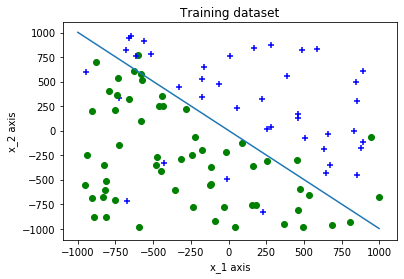

In [ ]:
# target function
def f_x(x):
    return 2-x

x_1 = np.zeros(100)
x_2 = np.zeros(100)
y_labels = np.zeros(100)

for i in range (0,100):
    x_1[i] = randint(-1000,1000)
    x_2[i] = randint(-1000,1000)
    if x_2[i]>f_x(x_1[i]):
        y_labels[i] = 1
    else:
        y_labels[i] = -1
    
    # switch 10 label to get nonlinearly separable dataset
    if i < 10:
        y_labels[i] = y_labels[i]*(-1)

# plot dataset and target function 

a = np.arange(-1000,1000)
plt.plot(a,f_x(a))
for i in range(0,100):
    if y_labels[i] > 0:
        plt.scatter(x_1[i],x_2[i], color = 'blue',marker = '+')
    else:
        plt.scatter(x_1[i],x_2[i], color = 'green')
plt.title("Training dataset")
plt.xlabel("x_1 axis")
plt.ylabel("x_2 axis")
plt.show()

Similarly, we create a test set of 1000 instances with 100 switched labels

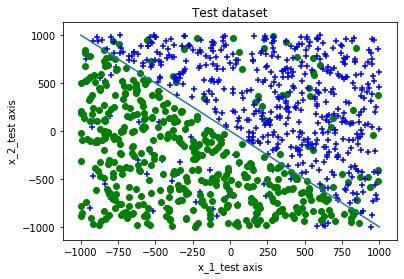

In [ ]:
# Generating test set

x_1_test = np.zeros(1000)
x_2_test = np.zeros(1000)
y_labels_test = np.zeros(1000)

for i in range (0,1000):
    x_1_test[i] = randint(-1000,1000)
    x_2_test[i] = randint(-1000,1000)
    if x_2_test[i]>f_x(x_1_test[i]):
        y_labels_test[i] = 1
    else:
        y_labels_test[i] = -1
    
    # switch 10 label to get nonlinearly separable dataset
    if i < 100:
        y_labels_test[i] = y_labels_test[i]*(-1)

a = np.arange(-1000,1000)
plt.plot(a,f_x(a))
for i in range(0,1000):
    if y_labels_test[i] > 0:
        plt.scatter(x_1_test[i],x_2_test[i], color = 'blue',marker = '+')
    else:
        plt.scatter(x_1_test[i],x_2_test[i], color = 'green')
plt.title("Test dataset")
plt.xlabel("x_1_test axis")
plt.ylabel("x_2_test axis")
plt.show()

Next, we implement pocket PLA with T=1000 iterations.

In [ ]:
#construction X matrix
X_train = np.zeros((100,3))

for i in range (0,100):
    for j in range (0,3):
        if j == 0:
            X_train[i][j] = 1
        elif j == 1:
            X_train[i][j] = x_1[i]
        else:
            X_train[i][j] = x_2[i]

def pocket(X, Y):
    w_pocket = sample(range(-10, 10), 3) #initializing random weights
    w_t = w_pocket
    E_in_wt = []
    E_in_wt_pocket = []
    
    for i in range(0, 1000):
        E_wt = 0
        E_wt_1 = 0
        E_wt_pocket = 0
        
        for k in range(0, len(X)):
            if (w_t[0]+w_t[1]*X[k][1]+w_t[2]*X[k][2])*Y[k] <= 0:
                E_wt += 1
            if (w_pocket[0]+w_pocket[1]*X[k][1]+w_pocket[2]*X[k][2])*Y[k] <= 0:
                E_wt_pocket += 1
                
        E_wt = E_wt/len(X)
        E_wt_pocket = E_wt_pocket/len(X)
        E_in_wt.append(E_wt)
        E_in_wt_pocket.append(E_wt_pocket)
        
        for j in range(len(X)-1, -1, -1):        
            if (w_t[0]+w_t[1]*X[j][1]+w_t[2]*X[j][2])*Y[j] <= 0:
                w_t = w_t + Y[j]*X[j]
                break
            else: 
                continue
        
        for m in range(0, len(X)):
            if (w_t[0]+w_t[1]*X[m][1]+w_t[2]*X[m][2])*Y[m] <= 0:
                E_wt += 1
                
        if E_wt/len(X) < E_wt_pocket:
            w_pocket = w_t

    return w_pocket, E_wt_pocket

Now, we are ready to run our algorithms on training dataset to obtain w_lin and w_pocket 

In [ ]:
# Constucting input x for linear regression
x = np.zeros((2, len(x_1)))
for i in range(0,2):
    for j in range(0, len(x_1)):
        if i == 0:
            x[i][j] = x_1[j]
        else:
            x[i][j] = x_2[j]
w_lin = linear_regression(x,y_labels)
w_pocket = pocket(X_train,y_labels)[0]

print("weights from linear regression algorithms: w_lin =", np.transpose(w_lin))
print("weights from pocket PLA: w_pocket =", w_pocket)

weights from linear regression algorithms: w_lin = [[-0.04108375  0.0007438   0.00095661]]
weights from pocket PLA: w_pocket = [ -16. 2838. 2796.]


Finally, it is time to test these weights on our test dataset

In [ ]:
# function for generating test sets
def generate_test_set(f_x):
    x_1_test = np.zeros(1000)
    x_2_test = np.zeros(1000)
    y_labels_test = np.zeros(1000)

    for i in range (0,1000):
        x_1_test[i] = randint(-1000,1000)
        x_2_test[i] = randint(-1000,1000)
        if x_2_test[i]>f_x(x_1_test[i]):
            y_labels_test[i] = 1
        else:
            y_labels_test[i] = -1
    
    # switch 100 label to get nonlinearly separable dataset
        if i < 100:
            y_labels_test[i] = y_labels_test[i]*(-1)
    return x_1_test, x_2_test, y_labels_test

# function for constructing X matrix
def matrix_x(x_1, x_2):
    X = np.zeros((1000,3))

    for i in range (0,1000):
        for j in range (0,3):
            if j == 0:
                X[i][j] = 1
            elif j == 1:
                X[i][j] = x_1[i]
            else:
                X[i][j] = x_2[i]
    return X

In [ ]:
# Calculating errors for w_lin
X_test = matrix_x(x_1_test, x_2_test)

E_lin = 0
E_pocket = 0
for i in range(0,1000):
    if (w_lin[0]+w_lin[1]*X_test[i][1]+w_lin[2]*X_test[i][2])*y_labels_test[i] <= 0:
        E_lin += 1
    if (w_pocket[0]+w_pocket[1]*X_test[i][1]+w_pocket[2]*X_test[i][2])*y_labels_test[i] <= 0:
        E_pocket += 1
    
print("Error of linear regression weights =", E_lin/1000)
print("Error of pocket PLA weights =", E_pocket/1000)

Error of linear regression weights = 0.14
Error of pocket PLA weights = 0.103


Repeating the experiment for 100 different test sets, we obtained the following results:

In [ ]:
error_lin = np.zeros(100)
error_pocket = np.zeros(100)

#Compute errors for 100 different test datasets
for i in range(0,100):
    test_dataset = generate_test_set(f_x)
    x1_test = test_dataset[0]
    x2_test = test_dataset[1]
    y_test = test_dataset[2]
    
    X_test = matrix_x(x1_test, x2_test)
    E_lin = 0
    E_pocket = 0
    for j in range(0,1000):
        if (w_lin[0]+w_lin[1]*X_test[j][1]+w_lin[2]*X_test[j][2])*y_test[j] <= 0:
            E_lin += 1
        if (w_pocket[0]+w_pocket[1]*X_test[j][1]+w_pocket[2]*X_test[j][2])*y_test[j] <= 0:
            E_pocket += 1
    
    error_lin[i] = E_lin/1000
    error_pocket[i] = E_pocket/1000

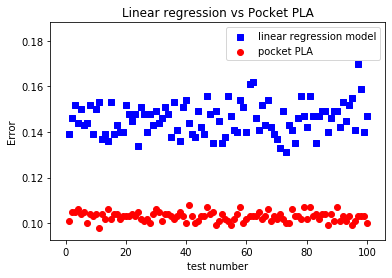

In [ ]:
#plot average E_out_wt and E_out_pocket
x = np.arange(1,101)

plt.title("Linear regression vs Pocket PLA")
plt.xlabel("test number")
plt.ylabel("Error")
plt.scatter(x,error_lin,color = 'blue', label = "linear regression model", marker = 's')
plt.scatter(x,error_pocket,color = 'red', label = "pocket PLA")
plt.legend()
plt.show()

From the figure above we can conclude that pocket PLA performs significatly better than linear regression model. In most cases pocket PLA achieved the best result of 0.1 error since we had (N/10) switched labels in our datasets, while linear regression sttrugled to find the best weights for linearly non-separable datasets.

Hence, we would definitely suggest to use pocket PLA over linear regression models on binary classification task with linearly non-separable data.